In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
bin_regreesion=pd.read_csv('dataset_regression.csv')
y=bin_regreesion.iloc[:,2]
x=bin_regreesion.iloc[:,1]


In [10]:
def compute_cost(w,b,X,Y):
    total_cost=0
    M =len(X)
    for i in range(M):
        x=X[i]
        y=Y[i]
        total_cost += (y-w*x-b)**2
    return total_cost/M

In [11]:
def fit(X,Y):
    M = len(X)
    x_bar=np.mean(X)
    sum_pro= 0
    sum_squ=0
    sum_delta =0
    for i in range(M):
        x=X[i]
        y=Y[i]
        sum_pro += y*(x-x_bar)
        sum_squ += x**2
    w = sum_pro/(sum_squ-M*(x_bar**2))
    for i in range(M):
        x=X[i]
        y=Y[i] 
        sum_delta += (y-w*x)
    b = sum_delta / M
    return w,b

1.976666666666667 -2.4671622769447922e-17
0.9257592592592595


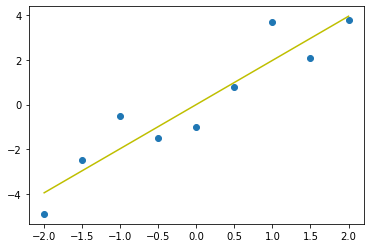

In [13]:
w,b=fit(x,y)
print(w,b)
cost_bin=compute_cost(w,b,x,y)
print(cost_bin)
plt.scatter(x,y)
plt.plot(x,w*x+b,'y-')

In [3]:
# data prepared
quality_factor = pd.read_csv('winequality-white.csv')
data,label=quality_factor.iloc[:,:-2],quality_factor.iloc[:,-1]
data,label=np.array(data),np.array(label)
data=np.hstack((np.ones((data.shape[0],1)), data))
x_train, x_test,  y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 7) 

In [4]:
def loss_fuc(theta, X_b, y):
    return np.sum((y - X_b.dot(theta))**2) / len(X_b)#除以样本数（多少行）

In [5]:
def gradient_cal(theta, X_b, y):
    res = np.empty(len(theta))
    #res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(0, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [20]:
loss_store=[]
def sgd(initial_weight,train_set,train_label,epsilon=0.01,epoch=10,batch_size=8,learning_rate=0.00001):
    weights=initial_weight
    for i in range(epoch):
        num=0
        input_x=np.empty((batch_size,train_set.shape[1]))
        input_y=[]
        for item in range(batch_size):
            select_data_index=np.random.randint(len(train_set))
            input_x[item,:]=train_set[select_data_index]
            input_y.append(train_label[select_data_index])
        gradient_set=gradient_cal(weights,input_x,input_y)
        if(abs(loss_fuc(weights, input_x, input_y) - loss_fuc(weights-gradient_set*learning_rate, input_x, input_y)) < epsilon):
            break
        num=num+ loss_fuc(weights-gradient_set*learning_rate, input_x, input_y)
        weights=weights-gradient_set*learning_rate
        loss_store.append(num/batch_size)
        
      
    return weights



[10.45424893425218, 4.627780935691536, 1.4510130108799533, 0.3489082277794272, 0.9150174767454767, 0.30499051359101315, 0.6120779822505849, 0.7292554551681194, 0.5756197762898132, 0.717485559847062]


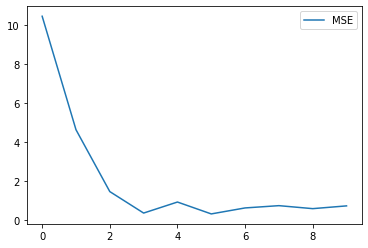

In [21]:
initial=np.random.normal(0,0.1,x_train.shape[1])
res=sgd(initial,x_train, y_train)
print(loss_store)
import matplotlib.pyplot as plt
plt.plot(np.arange(len(loss_store)),loss_store, '-',label="MSE")
plt.legend()


In [8]:
config=[0.000005,0.00001,0.000015,0.00002,0.000025,0.00003,0.000035,0.00004,0.00005]
result=[]
for item in config:
    res=sgd(initial,x_train, y_train,learning_rate=item)
    result.append(loss_fuc(res,x_train,y_train))

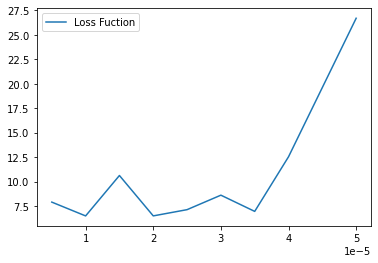

In [22]:
import matplotlib.pyplot as plt
plt.plot(config,result,label='Loss Fuction')
plt.legend()

In [10]:
print(res)
print(np.dot(res,x_test[1]))
print(y_test[1])

[-0.0487647  -0.04451879 -0.0229626  -0.01721053  0.16292964  0.29037108
  0.07108573 -0.01355269 -0.1945883  -0.02132652 -0.15991975]
0.8282461887671526
6


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [12]:
model_ore=np.around (model.predict(x_test))
print(model_ore)
print(y_test)
count_model=0
for i in range(len(x_test)):
    if(model_ore[i]==y_test[i]):
        count_model=count_model+1
print(count_model/len(model_ore))

[6. 7. 6. 5. 6. 6. 6. 5. 6. 5. 5. 6. 6. 5. 6. 5. 6. 6. 5. 6. 6. 7. 6. 6.
 7. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 7. 6. 6. 7. 6. 7. 7. 7. 7. 7. 6. 6. 6.
 5. 5. 6. 7. 6. 6. 6. 5. 6. 5. 5. 6. 6. 5. 6. 5. 6. 6. 6. 6. 6. 6. 5. 6.
 5. 6. 6. 5. 7. 5. 6. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 5.
 7. 6. 7. 6. 6. 6. 6. 6. 7. 6. 6. 7. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 5. 6. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 5. 5. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 7. 6. 7. 6. 7. 6. 5. 6. 5. 6. 4. 6. 6. 6. 6. 6. 5. 6. 6. 6. 5.
 5. 5. 6. 6. 7. 7. 5. 7. 6. 6. 5. 6. 5. 6. 6. 6. 6. 6. 6. 5. 7. 5. 7. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 5. 6. 5. 5. 6. 5. 7. 6. 5. 6. 6. 6. 6. 7. 6. 5. 5. 6. 5. 5.
 7. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6. 7. 5. 5. 5. 6. 6. 6. 6.
 7. 5. 6. 6. 7. 6. 6. 7. 6. 6. 5. 5. 7. 6. 6. 6. 7. 6. 6. 6. 6. 6. 5. 6.
 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 5. 6. 6. 6. 6. 7. 7.